# TITLE HERE

Members:

Date: 



In [96]:
#1 Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

#2 Data
data_bmw = pd.read_csv("data\\BMW_Data.csv") #or if its a .json file pd.read_json
data_cars = pd.read_csv("data\\bmw.csv")

data_bmw

,Date,Adj_Close,Close,High,Low,Open,Volume
0,1996-11-08,8.100290,18.171000,18.209999,18.171000,18.209999,767000
1,1996-11-11,8.078445,18.122000,18.200001,18.082001,18.190001,260000
2,1996-11-12,8.139520,18.259001,18.327999,18.091999,18.160999,1066000
3,1996-11-13,8.126592,18.230000,18.344000,18.190001,18.344000,793000
4,1996-11-14,8.152893,18.289000,18.289000,18.132000,18.205000,351000
...,...,...,...,...,...,...,...
7207,2024-12-19,77.279999,77.279999,78.379997,76.900002,77.080002,1297262
7208,2024-12-20,77.580002,77.580002,77.860001,76.120003,76.699997,2000177
7209,2024-12-23,76.940002,76.940002,77.680000,76.260002,77.620003,642208
7210,2024-12-27,78.339996,78.339996,78.459999,76.739998,76.879997,958948


## Hypothesis
What factors affect the stock price of BMW

## Data Pre-Processing

In [97]:
# remove irellevant columns
#ata_cars = data_cars.drop(columns=['mileage','transmission','mileage','fuelType','tax','mpg','engineSize']) These columns can be used for the visualizations
                                    
# since our stock data starts at 1996, we will gather all cars that had at least one model since 1996
data_cars = data_cars[data_cars["year"] >= 1996]

data_cars = data_cars.sort_values(by=["year"], ascending=True)

data_cars

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9625,5 Series,1996,5995,Automatic,36000,Petrol,270,26.4,2.8
9841,Z3,1997,3950,Manual,49000,Petrol,270,35.3,1.9
9842,Z3,1998,3950,Manual,56500,Petrol,270,35.3,1.9
9560,Z3,1999,3995,Manual,51949,Petrol,255,35.3,1.9
9744,3 Series,1999,1200,Automatic,82000,Petrol,245,31.0,2.8
...,...,...,...,...,...,...,...,...,...
5128,3 Series,2020,36999,Semi-Auto,5500,Diesel,145,45.6,3.0
1771,X6,2020,65352,Semi-Auto,3158,Petrol,145,26.4,3.0
5588,8 Series,2020,66991,Semi-Auto,123,Petrol,145,33.2,3.0
2013,2 Series,2020,25603,Semi-Auto,2880,Petrol,145,50.4,1.5


In [98]:
# adds a column that specifies the year of each stock, important for joining the datasets because the other dataset only has year
data_bmw["Year"] = data_bmw["Date"].str.strip().str.extract(r"(\d{4})").astype(int)


# This groups by the years and averages on all the other columns (other than date)
avg_year = (
    data_bmw
    .groupby("Year")[["Adj_Close", "Close", "High", "Low", "Open", "Volume"]].mean()
    .sort_values("Year").reset_index()
    .rename(columns = {"Year" : "year"})
    )

# This filters for the years each model was released
model_release = data_cars.loc[data_cars.groupby("model")["year"].idxmin()].sort_values("year").reset_index(drop=True)

#this is the merged dataset, it will be used for the scatterplot but probably not much else because its only 23 rows
bmw_merge = pd.merge(model_release, avg_year, on = "year").drop_duplicates()

## Data Visualizations

Text(0, 0.5, 'Stock Close Value')

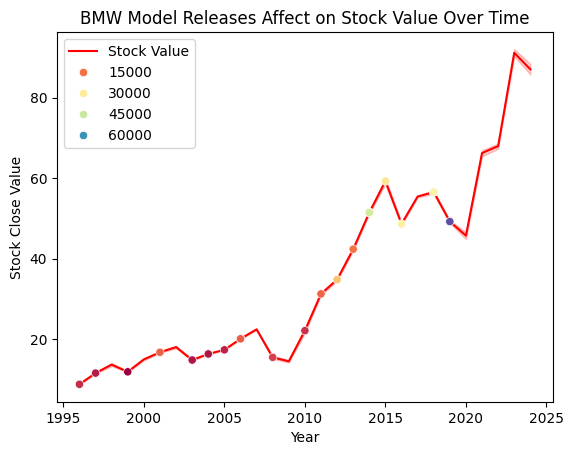

In [ ]:
# This shows the adjusted stock close over time with points indicating when a new model is released and their price, legend still needs to be fixed
sns.lineplot(data = data_bmw, y = "Adj_Close", x = "Year", color = "red", zorder = 1, label = "Stock Value")
sns.scatterplot(data = bmw_merge, y = "Adj_Close", x = "year", hue = "price",  palette="Spectral", zorder = 2)
plt.title("BMW Model Releases Affect on Stock Value Over Time")
plt.legend()
plt.xlabel("Year")
plt.ylabel("Stock Close Value")

### Interpretation:


## Conclusions

## Potential Limitations

## Sources